In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data = pd.read_csv('cleaned_data.csv')
data['constant'] = 1

In [30]:
data.head()

,ID,school,critical_mass,15_pers_p,14_pers_p,13_pers_p,12_pers_p,11_pers_p,10_pers_p,white,...,nat_am_alsk,hispanic,multi,asian,hi_pi,unknown,ell,sped,free_lunch,constant
0,610334,Al Raby High School,0.103448,51.1,54.8,65.6,76.9,58.5,73.5,0.5,...,0.0000,5.8,0.00,0.265,0.2646,0.000,0.0265,0.2672,0.9868,1
1,609720,Albert G Lane Tech High School,0.178571,89.5,91.3,88.4,90.6,86.2,89.3,35.3,...,0.3831,40.8,2.64,10.545,0.2704,2.096,0.0059,0.0435,0.4923,1
2,610518,Austin College and Career Acad,0.052632,50.0,47.6,54.5,47.9,50.0,50.0,0.5,...,0.4566,2.3,0.46,0.000,0.0000,0.000,0.0137,0.2968,0.9680,1
3,609764,Benito Juarez High School,0.324786,63.3,64.4,66.3,66.7,63.9,74.0,0.7,...,0.3460,94.5,0.17,0.288,0.0000,0.634,0.1943,0.1615,0.9550,1
4,610323,Bowen High School,0.100000,32.5,44.1,52.6,52.9,61.9,62.8,0.7,...,0.0000,20.9,0.34,0.000,0.0000,0.000,0.0741,0.3098,0.9192,1


In [5]:
# descriptive statistics for critical_mass
critical_mass = data['critical_mass']
critical_mass.describe()

count    71.000000
mean      0.182329
std       0.101855
min       0.000000
25%       0.103271
50%       0.172840
75%       0.266956
max       0.416667
Name: critical_mass, dtype: float64

In [9]:
# descriptive statistics for other variables
print("Descriptive statistics for 2015 Persistence:")
data['15_pers_p'].describe()

Descriptive statistics for 2015 Persistence:


count    71.000000
mean     61.869014
std      17.364558
min      17.600000
25%      51.400000
50%      61.400000
75%      73.300000
max      94.100000
Name: 15_pers_p, dtype: float64

In [10]:
print("Descriptive statistics for 2014 Persistence:")
data['14_pers_p'].describe()

Descriptive statistics for 2014 Persistence:


count    71.000000
mean     62.394366
std      16.738867
min      29.600000
25%      50.050000
50%      63.900000
75%      72.450000
max      96.500000
Name: 14_pers_p, dtype: float64

In [11]:
print("Descriptive statistics for 2013 Persistence:")
data['13_pers_p'].describe()

Descriptive statistics for 2013 Persistence:


count    71.000000
mean     62.846479
std      16.880816
min      26.700000
25%      50.500000
50%      65.300000
75%      75.300000
max      95.000000
Name: 13_pers_p, dtype: float64

In [12]:
print("Descriptive statistics for 2012 Persistence:")
data['12_pers_p'].describe()

Descriptive statistics for 2012 Persistence:


count    71.000000
mean     64.585915
std      14.719436
min      28.200000
25%      54.050000
50%      66.000000
75%      73.950000
max      95.700000
Name: 12_pers_p, dtype: float64

In [13]:
print("Descriptive statistics for 2011 Persistence:")
data['11_pers_p'].describe()

Descriptive statistics for 2011 Persistence:


count    71.000000
mean     64.380282
std      14.232795
min      18.200000
25%      53.650000
50%      62.800000
75%      74.800000
max      95.200000
Name: 11_pers_p, dtype: float64

In [14]:
print("Descriptive statistics for 2010 Persistence:")
data['10_pers_p'].describe()

Descriptive statistics for 2010 Persistence:


count    71.000000
mean     68.229296
std      12.913266
min      32.400000
25%      62.250000
50%      68.500000
75%      75.550000
max      98.500000
Name: 10_pers_p, dtype: float64

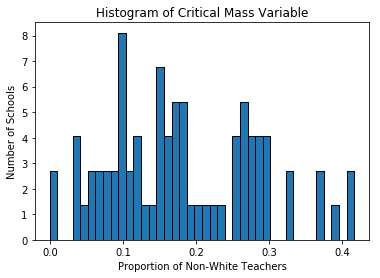

In [20]:
plt.hist(critical_mass, bins=40, edgecolor="black", normed=True)
plt.title("Histogram of Critical Mass Variable")
plt.xlabel("Proportion of Non-White Teachers")
plt.ylabel("Number of Schools")

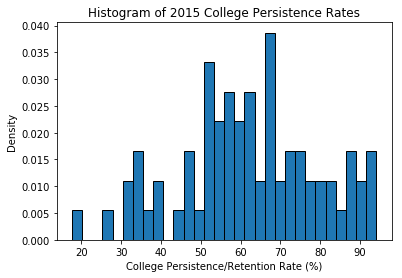

In [24]:
persistence_15 = data['15_pers_p']
plt.hist(persistence_15, bins=30, edgecolor="black", normed=True)
plt.title("Histogram of 2015 College Persistence Rates")
plt.xlabel("College Persistence/Retention Rate (%)")
plt.ylabel("Density")

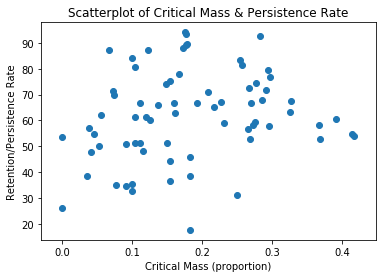

In [26]:
plt.scatter(x=critical_mass, y=persistence_15)
plt.title('Scatterplot of Critical Mass & Persistence Rate')
plt.xlabel('Critical Mass (proportion)')
plt.ylabel('Retention/Persistence Rate')

In [31]:
data.columns

Index(['ID', 'school', 'critical_mass', '15_pers_p', '14_pers_p', '13_pers_p',
       '12_pers_p', '11_pers_p', '10_pers_p', 'white', 'black', 'nat_am_alsk',
       'hispanic', 'multi', 'asian', 'hi_pi', 'unknown', 'ell', 'sped',
       'free_lunch', 'constant'],
      dtype='object')

In [33]:
import statsmodels.api as sm
X_vars = data[['constant','critical_mass', 'white', 'black', 'nat_am_alsk', 'hispanic', 'multi', 'asian', 'hi_pi', 'unknown', 'ell', 'sped', 'free_lunch']]
reg = sm.OLS(endog=persistence_15, exog=X_vars, missing='drop')
reg_results = reg.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:              15_pers_p   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     11.72
Date:                Sun, 06 May 2018   Prob (F-statistic):           1.67e-11
Time:                        20:04:01   Log-Likelihood:                -259.21
No. Observations:                  71   AIC:                             544.4
Df Residuals:                      58   BIC:                             573.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
constant         70.1730   2902.180      0.024